<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Fraud_check_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data = pd.get_dummies(data=data, columns=['Undergrad','Urban'], drop_first=True)

In [5]:
data = pd.get_dummies(data=data, columns=['Marital.Status'])

In [6]:
data['Tax_inc'] = pd.cut(data['Taxable.Income'], bins=(10000,30000,99620),labels=('risky','Good'))

In [7]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc
0,68833,50047,10,0,1,0,0,1,Good
1,33700,134075,18,1,1,1,0,0,Good
2,36925,160205,30,0,1,0,1,0,Good
3,50190,193264,15,1,1,0,0,1,Good
4,81002,27533,28,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0,Good
596,69967,55369,2,1,1,1,0,0,Good
597,47334,154058,0,0,1,1,0,0,Good
598,98592,180083,17,1,0,0,1,0,Good


In [8]:
data = pd.get_dummies(data, columns=['Tax_inc'], drop_first=True)

In [9]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc_Good
0,68833,50047,10,0,1,0,0,1,1
1,33700,134075,18,1,1,1,0,0,1
2,36925,160205,30,0,1,0,1,0,1
3,50190,193264,15,1,1,0,0,1,1
4,81002,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0,1
596,69967,55369,2,1,1,1,0,0,1
597,47334,154058,0,0,1,1,0,0,1
598,98592,180083,17,1,0,0,1,0,1


In [10]:
x = data.iloc[:,1:8]
y = data.iloc[:,8]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=6)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

[Text(0.625, 0.875, 'X[0] <= 195189.5\nentropy = 0.682\nsamples = 420\nvalue = [76, 344]'),
 Text(0.5, 0.625, 'X[1] <= 13.5\nentropy = 0.692\nsamples = 410\nvalue = [76, 334]'),
 Text(0.25, 0.375, 'X[0] <= 193594.0\nentropy = 0.603\nsamples = 190\nvalue = [28, 162]'),
 Text(0.125, 0.125, 'entropy = 0.58\nsamples = 188\nvalue = [26, 162]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.375, 'X[1] <= 20.5\nentropy = 0.757\nsamples = 220\nvalue = [48, 172]'),
 Text(0.625, 0.125, 'entropy = 0.883\nsamples = 83\nvalue = [25, 58]'),
 Text(0.875, 0.125, 'entropy = 0.653\nsamples = 137\nvalue = [23, 114]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]')]

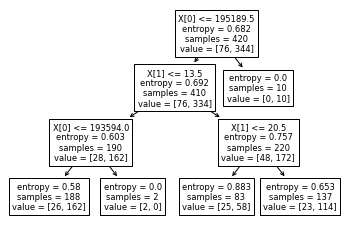

In [42]:
plot_tree(model)

In [45]:
import matplotlib.pyplot as plt


[Text(0.625, 0.875, 'City.Population <= 195189.5\nentropy = 0.682\nsamples = 420\nvalue = [76, 344]\nclass = 1'),
 Text(0.5, 0.625, 'Work.Experience <= 13.5\nentropy = 0.692\nsamples = 410\nvalue = [76, 334]\nclass = 1'),
 Text(0.25, 0.375, 'City.Population <= 193594.0\nentropy = 0.603\nsamples = 190\nvalue = [28, 162]\nclass = 1'),
 Text(0.125, 0.125, 'entropy = 0.58\nsamples = 188\nvalue = [26, 162]\nclass = 1'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.75, 0.375, 'Work.Experience <= 20.5\nentropy = 0.757\nsamples = 220\nvalue = [48, 172]\nclass = 1'),
 Text(0.625, 0.125, 'entropy = 0.883\nsamples = 83\nvalue = [25, 58]\nclass = 1'),
 Text(0.875, 0.125, 'entropy = 0.653\nsamples = 137\nvalue = [23, 114]\nclass = 1'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1')]

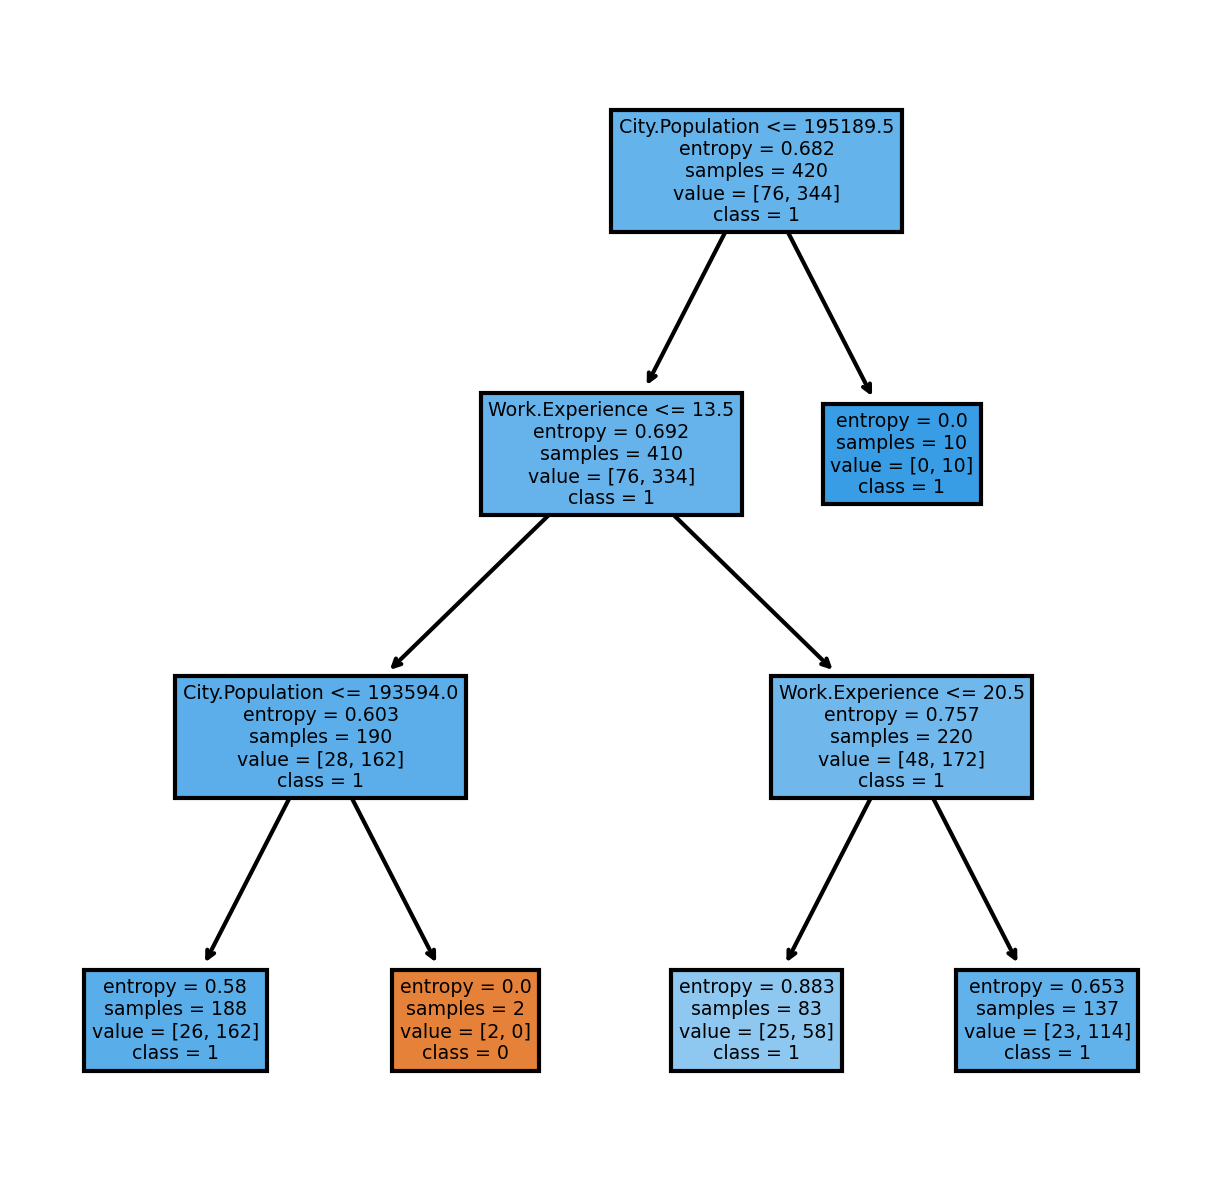

In [46]:
fn = ['City.Population',	'Work.Experience',	'Undergrad_YES',	'Urban_YES',	'Marital.Status_Divorced',	'Marital.Status_Married',	'Marital.Status_Single',	]
cn = ['0','1']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [43]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accu = accuracy_score(y_test,y_pred)

In [16]:
accu

0.7333333333333333

In [17]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=3)
model1.fit(x_train,y_train)
Y_pred = model1.predict(x_test)

In [18]:
accu1 = accuracy_score(y_test,Y_pred)

In [19]:
accu1

0.7277777777777777

In [20]:
from sklearn.model_selection import cross_val_score

In [31]:
cv1 = cross_val_score(model,x_train,y_train,cv=6)

In [32]:
cv1

array([0.81428571, 0.81428571, 0.81428571, 0.81428571, 0.81428571,
       0.81428571])

In [37]:
mean = cv1.mean()*100

In [34]:
cv = cross_val_score(model,x_train,y_train,cv=8)

In [35]:
cv.mean()

0.804789550072569

In [38]:
print(f'The cross validation score for 6folds is {mean}')

The cross validation score for 6folds is 81.42857142857142


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

In [40]:
cm = confusion_matrix(y_test,y_pred)

In [41]:
cm

array([[  0,  48],
       [  0, 132]])

In [51]:
y_prob = model.predict_proba(x_test)[:,1]

In [52]:
y_prob

array([0.69879518, 0.83211679, 0.83211679, 0.83211679, 0.83211679,
       0.69879518, 0.69879518, 0.69879518, 0.86170213, 0.69879518,
       0.69879518, 0.83211679, 0.83211679, 1.        , 0.69879518,
       0.83211679, 0.86170213, 0.69879518, 0.86170213, 0.86170213,
       0.86170213, 0.83211679, 0.83211679, 0.86170213, 0.83211679,
       0.83211679, 1.        , 0.86170213, 0.86170213, 0.69879518,
       0.69879518, 0.86170213, 0.86170213, 0.86170213, 0.86170213,
       0.69879518, 0.69879518, 0.86170213, 0.69879518, 0.83211679,
       0.83211679, 1.        , 0.86170213, 0.86170213, 0.86170213,
       0.86170213, 0.69879518, 0.86170213, 0.86170213, 0.83211679,
       0.86170213, 0.83211679, 0.83211679, 0.86170213, 0.69879518,
       0.83211679, 0.83211679, 0.83211679, 0.83211679, 0.83211679,
       0.83211679, 0.69879518, 0.86170213, 0.86170213, 0.86170213,
       0.86170213, 0.69879518, 1.        , 0.83211679, 0.69879518,
       0.83211679, 0.83211679, 0.83211679, 0.86170213, 0.86170

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

In [58]:
fpr,tpr,thresholds

(array([0.        , 0.0625    , 0.5       , 0.79166667, 1.        ]),
 array([0.        , 0.01515152, 0.41666667, 0.78030303, 1.        ]),
 array([2.        , 1.        , 0.86170213, 0.83211679, 0.69879518]))

In [54]:
df = auc = roc_auc_score(y_test,y_pred)

In [56]:
auc

0.5

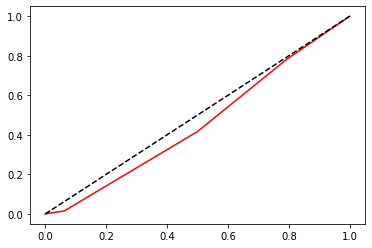

In [55]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')

In [57]:
from sklearn.preprocessing import normalize

In [59]:
df = normalize(data.iloc[:,1:8])

In [60]:
df

array([[9.99999980e-01, 1.99812172e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.99812172e-05],
       [9.99999991e-01, 1.34253215e-04, 7.45851196e-06, ...,
        7.45851196e-06, 0.00000000e+00, 0.00000000e+00],
       [9.99999982e-01, 1.87260070e-04, 0.00000000e+00, ...,
        0.00000000e+00, 6.24200232e-06, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.49106181e-06, 0.00000000e+00, 0.00000000e+00],
       [9.99999996e-01, 9.44009147e-05, 5.55299498e-06, ...,
        0.00000000e+00, 5.55299498e-06, 0.00000000e+00],
       [9.99999995e-01, 1.01178092e-04, 0.00000000e+00, ...,
        6.32363074e-06, 0.00000000e+00, 0.00000000e+00]])

In [61]:
df = pd.DataFrame(df)

In [62]:
df

,0,1,2,3,4,5,6
0,1.000000,0.000200,0.000000,0.000020,0.000000,0.000000,0.000020
1,1.000000,0.000134,0.000007,0.000007,0.000007,0.000000,0.000000
2,1.000000,0.000187,0.000000,0.000006,0.000000,0.000006,0.000000
3,1.000000,0.000078,0.000005,0.000005,0.000000,0.000000,0.000005
4,0.999999,0.001017,0.000000,0.000000,0.000000,0.000036,0.000000
...,...,...,...,...,...,...,...
595,1.000000,0.000177,0.000025,0.000025,0.000025,0.000000,0.000000
596,1.000000,0.000036,0.000018,0.000018,0.000018,0.000000,0.000000
597,1.000000,0.000000,0.000000,0.000006,0.000006,0.000000,0.000000
598,1.000000,0.000094,0.000006,0.000000,0.000000,0.000006,0.000000


In [63]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [64]:
df_norm = norm_func(data.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Tax_inc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,0.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,0.0,0.0,1.0,1.0
593,0.610256,0.333333,0.0,1.0,1.0,0.0,0.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,0.0,0.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,1.0,0.0,0.0,1.0


In [66]:
x1 = data.iloc[:,1:8]
y1 = data.iloc[:,8]

In [67]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.3,random_state=6)

In [68]:
mod = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [69]:
mod.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=3)

In [70]:
y1_pred = mod.predict(x1_test)

In [71]:
np.mean(y1_test==y1_pred)

0.7277777777777777

In [73]:
y1_prob = mod.predict_proba(x1_test)[:,1]

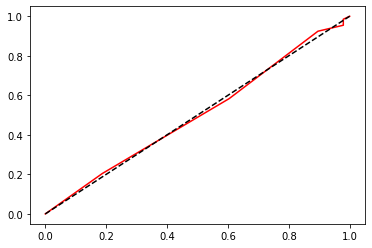

In [74]:
fpr,tpr,thresholds = roc_curve(y1_test,y1_prob)
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')


In [75]:
auc = roc_auc_score(y1_test,y1_pred)

In [76]:
auc

0.5028409090909092